# 🔬EDA Y ETL PARA BASE DE DATOS COMER LOGISTICS: 🖥️

## ARCHIVO A TRABAJAR : 2017PurchasePricesDec.csv

In [1]:
pip install pandas numpy matplotlib seaborn 

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
! pip freeze > requirements.txt 

In [3]:
import pandas as pd 

##### CARGA Y LIMPIEZA DE DATOS - Limpiar datos, manejar valores nulos, transformar formatos y preparar los datos para análisis más profundos:

In [4]:
#carga archivo csv
df = pd.read_csv(r'C:\Users\danie\OneDrive\Escritorio\GitProyectoFinal\ComerLogistics\EDA y ETL Dani\2017PurchasePricesDec.csv')

In [5]:
print(df.head())

   Brand                  Description  Price   Size Volume  Classification  \
0     58  Gekkeikan Black & Gold Sake  12.99  750mL    750               1   
1     62     Herradura Silver Tequila  36.99  750mL    750               1   
2     63   Herradura Reposado Tequila  38.99  750mL    750               1   
3     72         No. 3 London Dry Gin  34.99  750mL    750               1   
4     75    Three Olives Tomato Vodka  14.99  750mL    750               1   

   PurchasePrice  VendorNumber                   VendorName  
0           9.28          8320  SHAW ROSS INT L IMP LTD      
1          28.67          1128  BROWN-FORMAN CORP            
2          30.46          1128  BROWN-FORMAN CORP            
3          26.11          9165  ULTRA BEVERAGE COMPANY LLP   
4          10.94          7245  PROXIMO SPIRITS INC.         


In [6]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12261 entries, 0 to 12260
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Brand           12261 non-null  int64  
 1   Description     12260 non-null  object 
 2   Price           12261 non-null  float64
 3   Size            12260 non-null  object 
 4   Volume          12260 non-null  object 
 5   Classification  12261 non-null  int64  
 6   PurchasePrice   12261 non-null  float64
 7   VendorNumber    12261 non-null  int64  
 8   VendorName      12261 non-null  object 
dtypes: float64(2), int64(3), object(4)
memory usage: 862.2+ KB
None


In [7]:
print(df.describe()) # # Obtener estadísticas descriptivas de las variables numéricas

              Brand         Price  Classification  PurchasePrice  \
count  12261.000000  12261.000000    12261.000000   12261.000000   
mean   17989.067123     38.640240        1.708996      26.488220   
std    12528.503464    206.151172        0.454244     156.182948   
min       58.000000      0.000000        1.000000       0.000000   
25%     5990.000000     10.990000        1.000000       6.890000   
50%    18788.000000     15.990000        2.000000      10.650000   
75%    25117.000000     29.990000        2.000000      20.130000   
max    90631.000000  13999.900000        2.000000   11111.030000   

        VendorNumber  
count   12261.000000  
mean    10814.861757  
std     19007.682322  
min         2.000000  
25%      3960.000000  
50%      7153.000000  
75%      9552.000000  
max    173357.000000  


In [8]:
# Identificar la cantidad de valores nulos en cada columna
print("Valores nulos antes de la limpieza:\n", df.isnull().sum())

Valores nulos antes de la limpieza:
 Brand             0
Description       1
Price             0
Size              1
Volume            1
Classification    0
PurchasePrice     0
VendorNumber      0
VendorName        0
dtype: int64


### Limpieza de Datos (ETL). Manejo de valores nulos : 

In [9]:
# Limpiar valores nulos
df['Description'] = df['Description'].fillna('Unknown')
df['Size'] = df['Size'].fillna('Unknown')
df['Volume'] = df['Volume'].fillna('Unknown')

In [10]:
# Verificar que no queden valores nulos
print("Valores nulos después de la limpieza:\n", df.isnull().sum())

Valores nulos después de la limpieza:
 Brand             0
Description       0
Price             0
Size              0
Volume            0
Classification    0
PurchasePrice     0
VendorNumber      0
VendorName        0
dtype: int64


###  Análisis de Relaciones entre Variables y Visualización de Distribuciones

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

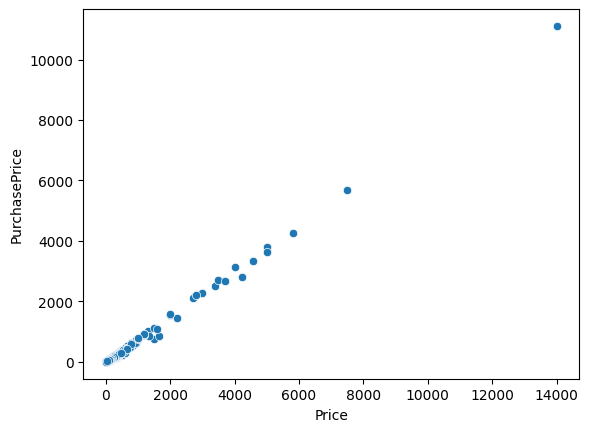

In [12]:
# Relación entre Price y PurchasePrice
sns.scatterplot(data=df, x='Price', y='PurchasePrice')
plt.show()

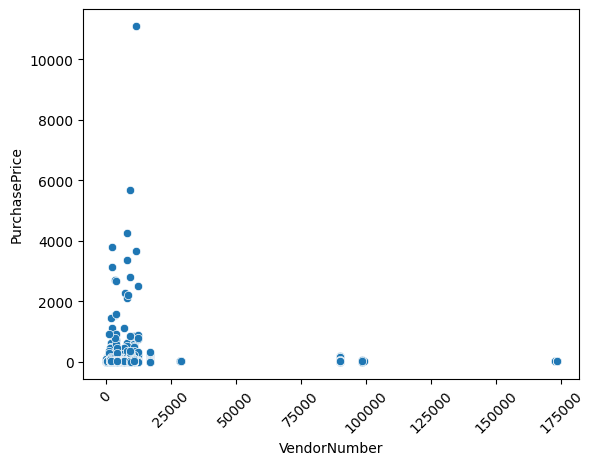

In [13]:
# Relación entre VendorNumber y PurchasePrice
sns.scatterplot(data=df, x='VendorNumber', y='PurchasePrice')
plt.xticks (rotation=45)
plt.show()

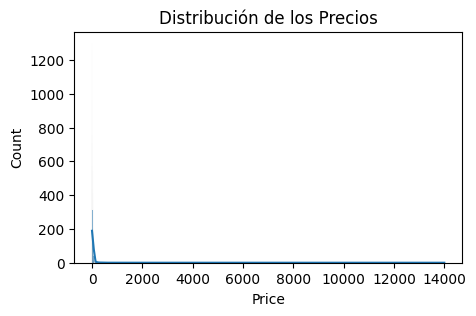

In [16]:
# Distribución de la columna 'Price'
plt.figure(figsize=(5, 3))
sns.histplot(df['Price'], kde=True)
plt.title('Distribución de los Precios')
plt.show()

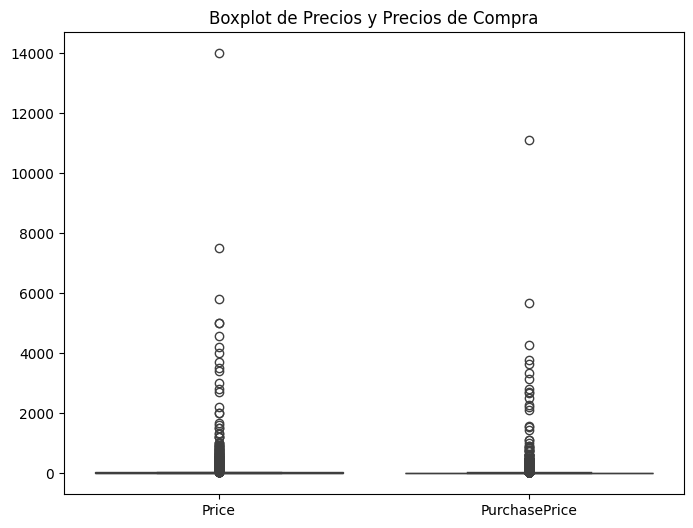

In [17]:
# Boxplot para analizar la dispersión de 'Price' y 'PurchasePrice'
plt.figure(figsize=(8, 6))
sns.boxplot(data=df[['Price', 'PurchasePrice']])
plt.title('Boxplot de Precios y Precios de Compra')
plt.show()

### Transformaciones ETL

In [18]:
# Crear una nueva columna 'ProfitMargin' calculada como la diferencia entre Price y PurchasePrice
df['ProfitMargin'] = df['Price'] - df['PurchasePrice']

In [19]:
# Convertir la columna 'Size' en un número
df['SizeNumeric'] = df['Size'].str.extract(r'(\d+)').astype(float)

#### Guardar el dataset limpio

In [20]:
# Guardar el DataFrame transformado
df.to_csv('purchasePricesDec_new.csv', index=False)

In [21]:
#carga archivo csv
df1 = pd.read_csv(r'C:\Users\danie\OneDrive\Escritorio\GitProyectoFinal\ComerLogistics\EDA y ETL Dani\purchasePricesDec_new.csv')

In [22]:
print(df1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12261 entries, 0 to 12260
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Brand           12261 non-null  int64  
 1   Description     12261 non-null  object 
 2   Price           12261 non-null  float64
 3   Size            12261 non-null  object 
 4   Volume          12261 non-null  object 
 5   Classification  12261 non-null  int64  
 6   PurchasePrice   12261 non-null  float64
 7   VendorNumber    12261 non-null  int64  
 8   VendorName      12261 non-null  object 
 9   ProfitMargin    12261 non-null  float64
 10  SizeNumeric     12256 non-null  float64
dtypes: float64(4), int64(3), object(4)
memory usage: 1.0+ MB
None


----

## ARCHIVO A TRABAJAR : SalesFINAL31122016.csv

## 1 - Configuración del Entorno en Visual Studio Code

 Instalación de las librerías necesarias

In [1]:
! pip install pandas numpy matplotlib seaborn sqlalchemy pyodbc


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
! pip freeze > requirements.txt

## 2 - Carga y Limpieza de los Datos (ETL) 

Carga del archivo CSV en un Dataframe de Pandas:

In [4]:
import pandas as pd

# Carga del archivo CSV
df = pd.read_csv(r'C:\Users\mlope\OneDrive\Escritorio\PROYECTO FINAL\DataBase_PF\SalesFINAL12312016.csv')

Inspección de datos:

In [5]:
print(df.head())  # Muestra las primeras filas

           InventoryId  Store  Brand                 Description        Size  \
0  1_HARDERSFIELD_1004      1   1004  Jim Beam w/2 Rocks Glasses       750mL   
1  1_HARDERSFIELD_1004      1   1004  Jim Beam w/2 Rocks Glasses       750mL   
2  1_HARDERSFIELD_1004      1   1004  Jim Beam w/2 Rocks Glasses       750mL   
3  1_HARDERSFIELD_1004      1   1004  Jim Beam w/2 Rocks Glasses       750mL   
4  1_HARDERSFIELD_1005      1   1005     Maker's Mark Combo Pack  375mL 2 Pk   

   SalesQuantity  SalesDollars  SalesPrice SalesDate  Volume  Classification  \
0              1         16.49       16.49  1/1/2016     750               1   
1              2         32.98       16.49  1/2/2016     750               1   
2              1         16.49       16.49  1/3/2016     750               1   
3              1         14.49       14.49  1/8/2016     750               1   
4              2         69.98       34.99  1/9/2016     375               1   

   ExciseTax  VendorNo                

Creación de Archivo Requirements:

In [6]:
! pip freeze > requirements.txt

## 2 - Carga y Limpieza de los Datos (ETL) 

Carga del archivo CSV en un Dataframe de Pandas:

In [8]:
import pandas as pd

# Carga del archivo CSV
df = pd.read_csv(r'C:\Users\mlope\OneDrive\Escritorio\PROYECTO FINAL\DataBase_PF\SalesFINAL12312016.csv')

Inspección de datos:

In [9]:
print(df.head())  # Muestra las primeras filas

           InventoryId  Store  Brand                 Description        Size  \
0  1_HARDERSFIELD_1004      1   1004  Jim Beam w/2 Rocks Glasses       750mL   
1  1_HARDERSFIELD_1004      1   1004  Jim Beam w/2 Rocks Glasses       750mL   
2  1_HARDERSFIELD_1004      1   1004  Jim Beam w/2 Rocks Glasses       750mL   
3  1_HARDERSFIELD_1004      1   1004  Jim Beam w/2 Rocks Glasses       750mL   
4  1_HARDERSFIELD_1005      1   1005     Maker's Mark Combo Pack  375mL 2 Pk   

   SalesQuantity  SalesDollars  SalesPrice SalesDate  Volume  Classification  \
0              1         16.49       16.49  1/1/2016     750               1   
1              2         32.98       16.49  1/2/2016     750               1   
2              1         16.49       16.49  1/3/2016     750               1   
3              1         14.49       14.49  1/8/2016     750               1   
4              2         69.98       34.99  1/9/2016     375               1   

   ExciseTax  VendorNo                

In [10]:
print(df.info())  # Información de columnas y tipos de datos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 14 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   InventoryId     1048575 non-null  object 
 1   Store           1048575 non-null  int64  
 2   Brand           1048575 non-null  int64  
 3   Description     1048575 non-null  object 
 4   Size            1048575 non-null  object 
 5   SalesQuantity   1048575 non-null  int64  
 6   SalesDollars    1048575 non-null  float64
 7   SalesPrice      1048575 non-null  float64
 8   SalesDate       1048575 non-null  object 
 9   Volume          1048575 non-null  int64  
 10  Classification  1048575 non-null  int64  
 11  ExciseTax       1048575 non-null  float64
 12  VendorNo        1048575 non-null  int64  
 13  VendorName      1048575 non-null  object 
dtypes: float64(3), int64(6), object(5)
memory usage: 112.0+ MB
None


In [11]:
print(df.describe())  # Estadísticas descriptivas

              Store         Brand  SalesQuantity  SalesDollars    SalesPrice  \
count  1.048575e+06  1.048575e+06   1.048575e+06  1.048575e+06  1.048575e+06   
mean   4.008063e+01  1.216959e+04   2.337619e+00  3.160420e+01  1.543162e+01   
std    2.435739e+01  1.241921e+04   3.511492e+00  6.570249e+01  1.404967e+01   
min    1.000000e+00  5.800000e+01   1.000000e+00  4.900000e-01  4.900000e-01   
25%    1.500000e+01  3.680000e+03   1.000000e+00  1.099000e+01  8.990000e+00   
50%    3.900000e+01  6.296000e+03   1.000000e+00  1.799000e+01  1.299000e+01   
75%    6.400000e+01  1.795400e+04   2.000000e+00  3.199000e+01  1.899000e+01   
max    7.900000e+01  9.008900e+04   4.320000e+02  1.327997e+04  4.999990e+03   

             Volume  Classification     ExciseTax      VendorNo  
count  1.048575e+06    1.048575e+06  1.048575e+06  1.048575e+06  
mean   9.500280e+02    1.416550e+00  1.326847e+00  6.995043e+03  
std    7.142708e+02    4.929872e-01  3.407898e+00  8.426736e+03  
min    5.000000

Visualización del tamaño del Dataframe (Filas y Columnas):

In [12]:
import numpy as np

In [13]:
np.shape(df)

(1048575, 14)

# Limpieza de Datos:

1 - Conversión del tipo de datos:

In [14]:
df['SalesDate'] = pd.to_datetime(df['SalesDate'], format='%m/%d/%Y')
df['SalesQuantity'] = pd.to_numeric(df['SalesQuantity'], errors='coerce')
df['SalesDollars'] = pd.to_numeric(df['SalesDollars'], errors='coerce')
df['SalesPrice'] = pd.to_numeric(df['SalesPrice'], errors='coerce')
df['Volume'] = pd.to_numeric(df['Volume'], errors='coerce')
df['ExciseTax'] = pd.to_numeric(df['ExciseTax'], errors='coerce')

2 - Busqueda de Nulos:

In [15]:
df.isnull().sum()

InventoryId       0
Store             0
Brand             0
Description       0
Size              0
SalesQuantity     0
SalesDollars      0
SalesPrice        0
SalesDate         0
Volume            0
Classification    0
ExciseTax         0
VendorNo          0
VendorName        0
dtype: int64

No se encontraron nulos

3 - Búsqueda de Duplicados:

In [16]:
duplicados = df[df.duplicated()]

print(duplicados)

Empty DataFrame
Columns: [InventoryId, Store, Brand, Description, Size, SalesQuantity, SalesDollars, SalesPrice, SalesDate, Volume, Classification, ExciseTax, VendorNo, VendorName]
Index: []


No se encontraron duplicados

## Paso 3: Análisis Exploratorio de Datos (EDA)

1 - Análisis básico:

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

Gráfico de Distribución de Ventas por Precio de Producto:

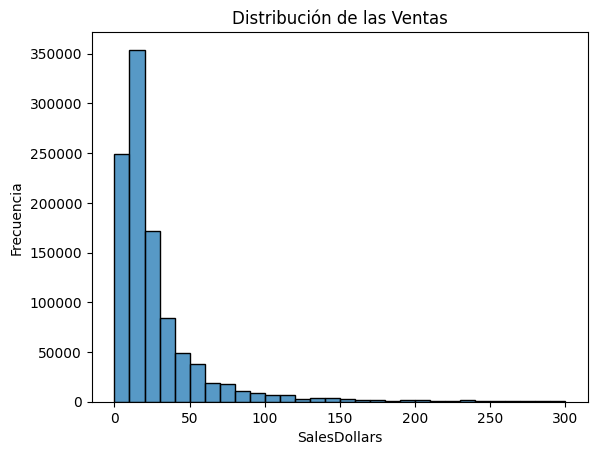

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['SalesDollars'], binwidth=10, binrange=(0, 300))  # Ajusta los valores según tus datos
plt.title('Distribución de las Ventas')
plt.xlabel('SalesDollars')
plt.ylabel('Frecuencia')
plt.show()

Relación entre SalesPrice y SalesQuantity:

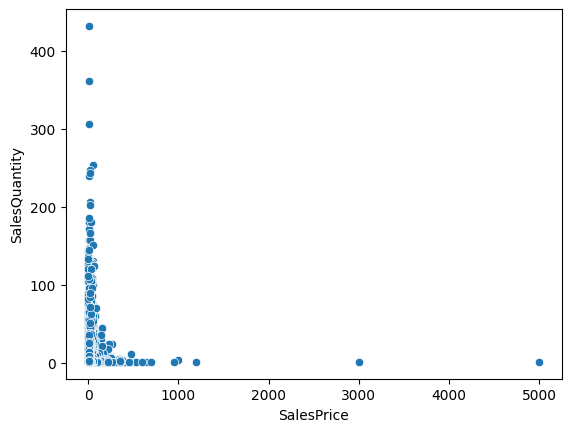

In [20]:
# Relación entre SalesPrice y SalesQuantity
sns.scatterplot(data=df, x='SalesPrice', y='SalesQuantity')
plt.show()

Datos Estadísticos Básicos:

In [21]:
def calcular_estadisticas(data): 
    for columna in data.columns:
        if data[columna].dtype == 'float64' or data[columna].dtype == 'int64':
            print(columna)
            print('Mediana:', data[columna].median())
            print('Varianza: ', np.around((data[columna].var()),decimals=2)) # Casteo (redondeo) a 2 decimales
            print('Rango:', data[columna].max() - data[columna].min())
            print('Moda:', data[columna].mode()[0])
            print('--------------------------------')

calcular_estadisticas(df)

Store
Mediana: 39.0
Varianza:  593.28
Rango: 78
Moda: 15
--------------------------------
Brand
Mediana: 6296.0
Varianza:  154236867.07
Rango: 90031
Moda: 3606
--------------------------------
SalesQuantity
Mediana: 1.0
Varianza:  12.33
Rango: 431
Moda: 1
--------------------------------
SalesDollars
Mediana: 17.99
Varianza:  4316.82
Rango: 13279.48
Moda: 9.99
--------------------------------
SalesPrice
Mediana: 12.99
Varianza:  197.39
Rango: 4999.5
Moda: 9.99
--------------------------------
Volume
Mediana: 750.0
Varianza:  510182.74
Rango: 19950
Moda: 750
--------------------------------
Classification
Mediana: 1.0
Varianza:  0.24
Rango: 1
Moda: 1
--------------------------------
ExciseTax
Mediana: 0.68
Varianza:  11.61
Rango: 378.51
Moda: 0.79
--------------------------------
VendorNo
Mediana: 4425.0
Varianza:  71009874.8
Rango: 173355
Moda: 3960
--------------------------------


Guardado del Dataframe en un archivo .CSV:

In [22]:
df.to_csv('C:/Users/mlope/OneDrive/Escritorio/PROYECTO FINAL/DataBase_PF/SalesFINAL_Limpio.csv', index=False)

Información de Columnas y Tipos de Datos:

In [23]:
print(df.info()) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 14 columns):
 #   Column          Non-Null Count    Dtype         
---  ------          --------------    -----         
 0   InventoryId     1048575 non-null  object        
 1   Store           1048575 non-null  int64         
 2   Brand           1048575 non-null  int64         
 3   Description     1048575 non-null  object        
 4   Size            1048575 non-null  object        
 5   SalesQuantity   1048575 non-null  int64         
 6   SalesDollars    1048575 non-null  float64       
 7   SalesPrice      1048575 non-null  float64       
 8   SalesDate       1048575 non-null  datetime64[ns]
 9   Volume          1048575 non-null  int64         
 10  Classification  1048575 non-null  int64         
 11  ExciseTax       1048575 non-null  float64       
 12  VendorNo        1048575 non-null  int64         
 13  VendorName      1048575 non-null  object        
dtypes: datetime64[ns](

--------------------

## 👩‍💻 Vamos a Trabajar con el archivo de InvoicePurchases12312016.csv🛠️

### 👉1. Preparación del entorno

In [16]:
# Importar librerías necesarias 📊
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 💾Grabar Librerias

In [17]:
# Grabar las dependencias a utilizar para su posterior uso automatizado.
! pip freeze > requirements.txt

In [ ]:
# Si quieren intalar las dependencias a usar usen el siguiente comando⚠️⚠️⚠️
! pip install -r requirements.txt

### 👉2. Carga de los archivo CSV a trabajar

In [18]:
# Cargar archivos CSV
invoice_purchases_df = pd.read_csv('C:/Users/hernan/Desktop/Hernan/henry/Proyecto Final/dataset/archive/InvoicePurchases12312016.csv')
# Mostrar las primeras filas del DataFrame
invoice_purchases_df.head()

,VendorNumber,VendorName,InvoiceDate,PONumber,PODate,PayDate,Quantity,Dollars,Freight,Approval
0,105,ALTAMAR BRANDS LLC,2016-01-04,8124,2015-12-21,2016-02-16,6,214.26,3.47,NaN
1,4466,AMERICAN VINTAGE BEVERAGE,2016-01-07,8137,2015-12-22,2016-02-21,15,140.55,8.57,NaN
2,388,ATLANTIC IMPORTING COMPANY,2016-01-09,8169,2015-12-24,2016-02-16,5,106.60,4.61,NaN
3,480,BACARDI USA INC,2016-01-12,8106,2015-12-20,2016-02-05,10100,137483.78,2935.20,NaN
4,516,BANFI PRODUCTS CORP,2016-01-07,8170,2015-12-24,2016-02-12,1935,15527.25,429.20,NaN


### 👉3. Inspección inicial del DataFrame🕵️
📝Revisión inicial de las características del DataFrame, incluyendo el número de filas y columnas, tipos de datos y estadísticas descriptivas.

In [19]:
# Tamaño del DataFrame
print(f"Tamaño del DataFrame: {invoice_purchases_df.shape}")

# Tipos de datos
print("\nTipos de datos:")
print(invoice_purchases_df.dtypes)

# Estadísticas descriptivas 📊
print("\nEstadísticas descriptivas:")
for estadisticas in invoice_purchases_df.columns:
    print(estadisticas)
    print(invoice_purchases_df[estadisticas].describe())
    print('--------------------------------')

Tamaño del DataFrame: (5543, 10)

Tipos de datos:
VendorNumber      int64
VendorName       object
InvoiceDate      object
PONumber          int64
PODate           object
PayDate          object
Quantity          int64
Dollars         float64
Freight         float64
Approval         object
dtype: object

Estadísticas descriptivas:
VendorNumber
count      5543.00000
mean      20662.75212
std       34582.15841
min           2.00000
25%        3089.00000
50%        7240.00000
75%       10754.00000
max      201359.00000
Name: VendorNumber, dtype: float64
--------------------------------
VendorName
count                            5543
unique                            129
top       AMERICAN VINTAGE BEVERAGE  
freq                               55
Name: VendorName, dtype: object
--------------------------------
InvoiceDate
count           5543
unique           373
top       2016-07-04
freq              43
Name: InvoiceDate, dtype: object
--------------------------------
PONumber
count     55

In [20]:
# Información básica del dataset 🧐
print("\nInformacion de culumnas y tipos de datos:")
print(invoice_purchases_df.info())


Informacion de culumnas y tipos de datos:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5543 entries, 0 to 5542
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   VendorNumber  5543 non-null   int64  
 1   VendorName    5543 non-null   object 
 2   InvoiceDate   5543 non-null   object 
 3   PONumber      5543 non-null   int64  
 4   PODate        5543 non-null   object 
 5   PayDate       5543 non-null   object 
 6   Quantity      5543 non-null   int64  
 7   Dollars       5543 non-null   float64
 8   Freight       5543 non-null   float64
 9   Approval      374 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 433.2+ KB
None


### 👉4. Detección de valores nulos y vacíos

In [21]:
# Cantidad de valores nulos por columna 🤔
print("Valores nulos por columna:")
print(invoice_purchases_df.isnull().sum())

# Porcentaje de valores nulos por columna 🤔
print("\nPorcentaje de valores nulos por columna:")
print(invoice_purchases_df.isnull().mean() * 100)

Valores nulos por columna:
VendorNumber       0
VendorName         0
InvoiceDate        0
PONumber           0
PODate             0
PayDate            0
Quantity           0
Dollars            0
Freight            0
Approval        5169
dtype: int64

Porcentaje de valores nulos por columna:
VendorNumber     0.000000
VendorName       0.000000
InvoiceDate      0.000000
PONumber         0.000000
PODate           0.000000
PayDate          0.000000
Quantity         0.000000
Dollars          0.000000
Freight          0.000000
Approval        93.252751
dtype: float64


📝No se detectaron nulos, Proseguimos con el analisis

### 👉5. Detección de Duplicados

In [22]:
# Detección de duplicados 🔍
duplicados = invoice_purchases_df.duplicated()
print(f"Duplicados encontrados: {duplicados.sum()}")

Duplicados encontrados: 0


📝No se detectaron Duplicados 

### 👉6. Transformacion de tipos de columnas 📝
📝Por el analisis que pudimos observar vemos que solo tenemos mal definidos los tipos de datos de las columnas InvoiceDate, PODate, y PayDate deberían ser de tipo datetime.

In [23]:
# Convertir las columnas de fechas a formato datetime 📅
invoice_purchases_df['InvoiceDate'] = pd.to_datetime(invoice_purchases_df['InvoiceDate'])
invoice_purchases_df['PODate'] = pd.to_datetime(invoice_purchases_df['PODate'])
invoice_purchases_df['PayDate'] = pd.to_datetime(invoice_purchases_df['PayDate'])

📝La columna Approval, aunque tiene valores faltantes (NaN), debería ser de tipo string o boolean si solo indica aprobación (True/False).

In [31]:
# Revisar la columna Approval: 
# Convertir los valores a True/False si es una columna de aprobación ✅
invoice_purchases_df['Approval'] = invoice_purchases_df['Approval'].apply(lambda x: True if pd.notnull(x) else False)

In [32]:
# Verificamos nuevamente la estructura y tipos de datos
print("\nInformación después de la corrección de tipos:")
print(invoice_purchases_df.info())

# Mostramos las primeras filas para verificar las conversiones
print("\nPrimeras filas del DataFrame corregido:")
print(invoice_purchases_df.head())


Información después de la corrección de tipos:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5543 entries, 0 to 5542
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   VendorNumber  5543 non-null   int64         
 1   VendorName    5543 non-null   object        
 2   InvoiceDate   5543 non-null   datetime64[ns]
 3   PONumber      5543 non-null   int64         
 4   PODate        5543 non-null   datetime64[ns]
 5   PayDate       5543 non-null   datetime64[ns]
 6   Quantity      5543 non-null   int64         
 7   Dollars       5543 non-null   float64       
 8   Freight       5543 non-null   float64       
 9   Approval      5543 non-null   bool          
dtypes: bool(1), datetime64[ns](3), float64(2), int64(3), object(1)
memory usage: 395.3+ KB
None

Primeras filas del DataFrame corregido:
   VendorNumber                   VendorName InvoiceDate  PONumber     PODate  \
0           105  ALTAMAR B

### 👉7.Guardamos el Nuevo Archivo Limpio📂

In [25]:
# Guardar el archivo limpio si es necesario
invoice_purchases_df.to_csv('InvoicePurchases12312016_clean.csv', index=False)

### 👉8.Cargar Nuevo Archivo para usar 🔄

In [26]:
# Cargar el archivo CSV limpio
invoice_purchases_df1 = pd.read_csv(r'C:\Users\hernan\Desktop\Hernan\henry\Proyecto Final\ComerLogistics\Sprint_1\EDA y ETL\InvoicePurchases12312016_clean.csv')

In [33]:
# Verificamos nuevamente la estructura y tipos de datos
print("\nInformación después de la corrección de tipos:")
print(invoice_purchases_df1.info())

# Mostramos las primeras filas para verificar las conversiones
print("\nPrimeras filas del DataFrame corregido:")
print(invoice_purchases_df1.head())


Información después de la corrección de tipos:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5543 entries, 0 to 5542
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   VendorNumber  5543 non-null   int64         
 1   VendorName    5543 non-null   object        
 2   InvoiceDate   5543 non-null   datetime64[ns]
 3   PONumber      5543 non-null   int64         
 4   PODate        5543 non-null   object        
 5   PayDate       5543 non-null   object        
 6   Quantity      5543 non-null   int64         
 7   Dollars       5543 non-null   float64       
 8   Freight       5543 non-null   float64       
 9   Approval      5543 non-null   bool          
dtypes: bool(1), datetime64[ns](1), float64(2), int64(3), object(3)
memory usage: 395.3+ KB
None

Primeras filas del DataFrame corregido:
   VendorNumber                   VendorName InvoiceDate  PONumber  \
0           105  ALTAMAR BRANDS LLC  

### 👉9. Analisis con Graficos ✅
### 📉1.Histograma de la columna Dollars 💵
📝Distribución de la columna Dollars: Un histograma para ver la distribución de los montos facturados.

C:\Users\hernan\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


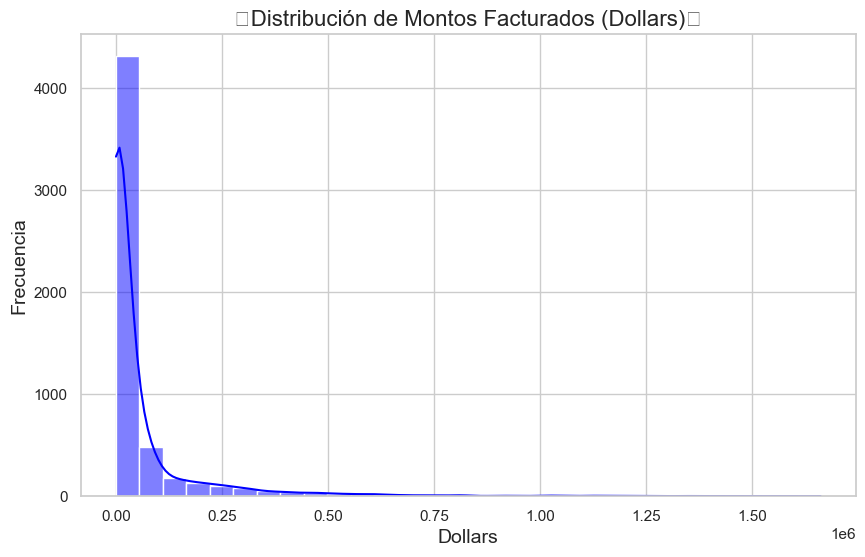

In [27]:
# Configurar el estilo de Seaborn
sns.set(style="whitegrid")

# 1. Histograma de la columna Dollars 💵
plt.figure(figsize=(10, 6))
sns.histplot(invoice_purchases_df1['Dollars'], bins=30, kde=True, color='blue')
plt.title('📉Distribución de Montos Facturados (Dollars)📉', fontsize=16)
plt.xlabel('Dollars', fontsize=14)
plt.ylabel('Frecuencia', fontsize=14)
plt.show()

📝Histograma de Dollars: Este gráfico muestra la distribución de los montos facturados, permitiendo observar la dispersión y la frecuencia de los valores.

### 📈2. Gráfico de dispersión entre Quantity y Dollars 📈
📝Relación entre Quantity y Dollars: Un gráfico de dispersión para analizar la relación entre la cantidad comprada y el valor total de la compra.

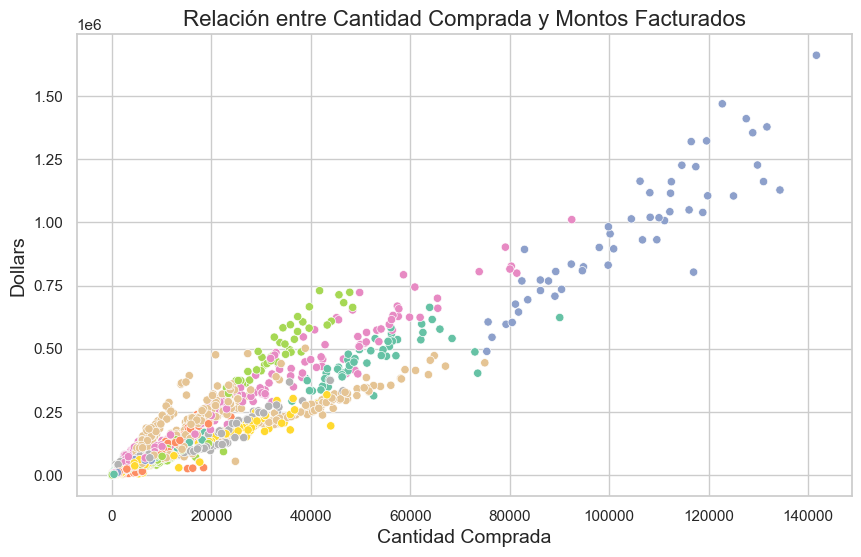

In [28]:
# 2. Gráfico de dispersión entre Quantity y Dollars 📈
plt.figure(figsize=(10, 6))
sns.scatterplot(data=invoice_purchases_df1, x='Quantity', y='Dollars', hue='VendorName', palette='Set2', legend=False)
plt.title('Relación entre Cantidad Comprada y Montos Facturados', fontsize=16)
plt.xlabel('Cantidad Comprada', fontsize=14)
plt.ylabel('Dollars', fontsize=14)
plt.show()

📝Gráfico de dispersión Quantity vs. Dollars: Este gráfico permite visualizar la relación entre la cantidad de unidades compradas y el total facturado, detectando posibles patrones o anomalías.

### 📊3. Gráfico de barras de montos por proveedor 🏢
📝Montos por proveedor (VendorName): Un gráfico de barras para visualizar los montos totales por proveedor.

C:\Users\hernan\AppData\Local\Temp\ipykernel_9048\1044103059.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_vendors.values, y=top_vendors.index, palette='Set1')


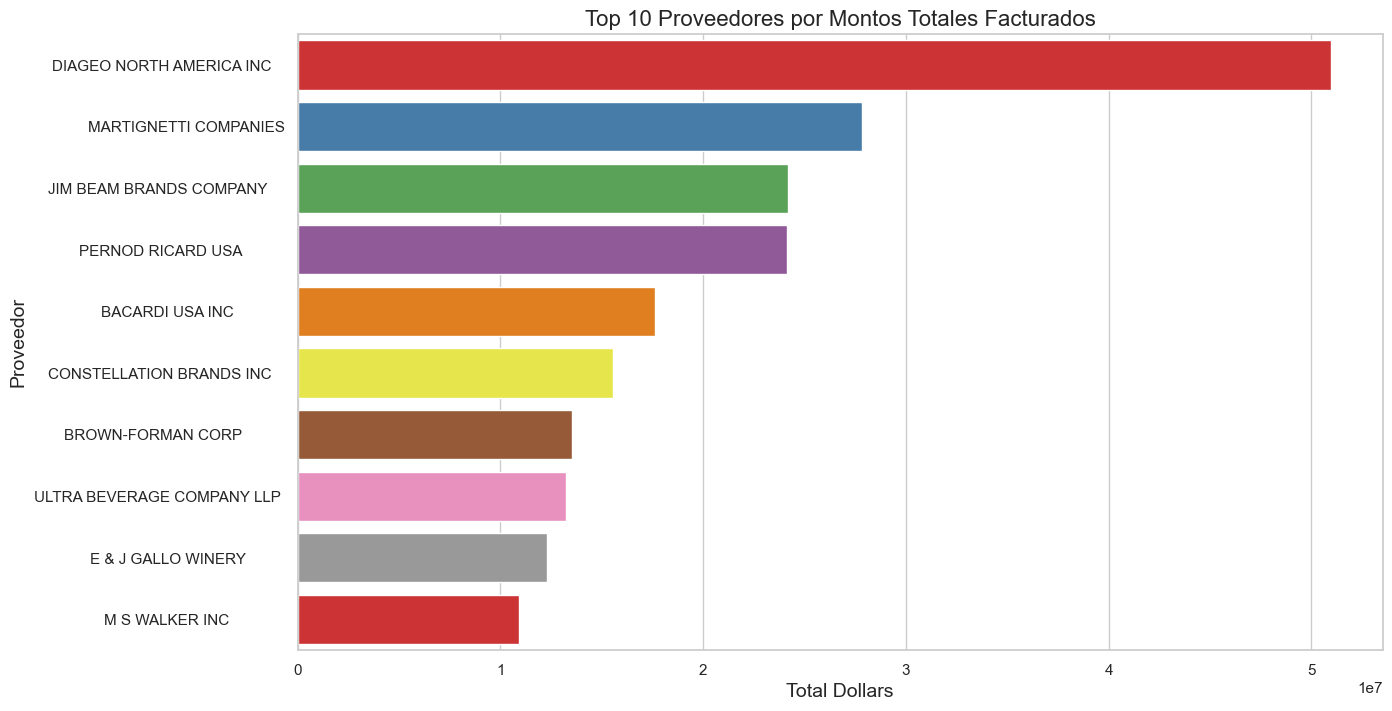

In [29]:
# 3. Gráfico de barras de montos por proveedor 🏢
plt.figure(figsize=(14, 8))
top_vendors = invoice_purchases_df1.groupby('VendorName')['Dollars'].sum().nlargest(10)
sns.barplot(x=top_vendors.values, y=top_vendors.index, palette='Set1')
plt.title('Top 10 Proveedores por Montos Totales Facturados', fontsize=16)
plt.xlabel('Total Dollars', fontsize=14)
plt.ylabel('Proveedor', fontsize=14)
plt.show()

📝Gráfico de barras de montos por proveedor: Visualiza los 10 proveedores principales por el monto total facturado, útil para identificar los proveedores más relevantes.

### 📈4. Gráfico de línea de tendencia temporal de las compras ⏰
📝Tendencia temporal de las compras (InvoiceDate): Un gráfico de línea para ver cómo evolucionan los montos de las compras a lo largo del tiempo.

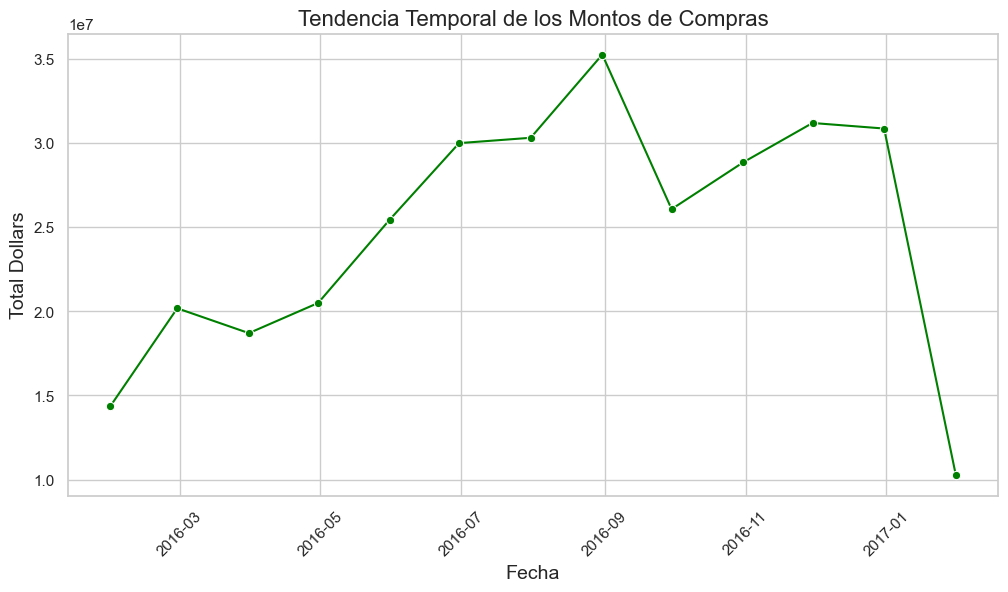

In [30]:
# 4. Gráfico de línea de tendencia temporal de las compras ⏰
invoice_purchases_df1['InvoiceDate'] = pd.to_datetime(invoice_purchases_df1['InvoiceDate'])
monthly_totals = invoice_purchases_df1.resample('ME', on='InvoiceDate')['Dollars'].sum()

plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_totals, marker='o', color='green')
plt.title('Tendencia Temporal de los Montos de Compras', fontsize=16)
plt.xlabel('Fecha', fontsize=14)
plt.ylabel('Total Dollars', fontsize=14)
plt.xticks(rotation=45)
plt.show()

📝Gráfico de línea de tendencia temporal: Este gráfico muestra cómo han variado los montos de compras a lo largo del tiempo, lo que puede indicar patrones estacionales o tendencias generales.

-----

### Trabajar

# EDA archivos BegInvFinal12312016.csv y EndInvFinal12312016.csv

## Preparamos el entorno

In [3]:
# Instalamos seaborn
! pip install seaborn


[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
# Carga de librerías
import pandas as pd
import numpy as np
import matplotlib  # Para poder establecer la version que se maneja, aunque no es necesario importar
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [5]:
# Imprimir versiones para asegurarnos de que estamos utilizando las correctas
print(f"Pandas version: {pd.__version__}")
print(f"Numpy version: {np.__version__}")
print(f"Matplotlib version: {matplotlib.__version__}")
print(f"Seaborn version: {sns.__version__}")

Pandas version: 2.2.2
Numpy version: 2.0.0
Matplotlib version: 3.9.0
Seaborn version: 0.13.2


In [6]:
# Establecemos el estado de dependencia
! pip freeze > requirementscfdr.txt # Para actualizar mi estado de dependencia

## Leemos el archivo

In [7]:
df_BegInvFINAL = pd.read_csv('BegInvFinal12312016.csv',sep=',')

In [8]:
df_EndInvFINAL = pd.read_csv('EndInvFinal12312016.csv',sep=',')

In [9]:
df_BegInvFINAL.head()

,InventoryId,Store,City,Brand,Description,Size,onHand,Price,startDate
0,1_HARDERSFIELD_58,1,HARDERSFIELD,58,Gekkeikan Black & Gold Sake,750mL,8,12.99,2016-01-01
1,1_HARDERSFIELD_60,1,HARDERSFIELD,60,Canadian Club 1858 VAP,750mL,7,10.99,2016-01-01
2,1_HARDERSFIELD_62,1,HARDERSFIELD,62,Herradura Silver Tequila,750mL,6,36.99,2016-01-01
3,1_HARDERSFIELD_63,1,HARDERSFIELD,63,Herradura Reposado Tequila,750mL,3,38.99,2016-01-01
4,1_HARDERSFIELD_72,1,HARDERSFIELD,72,No. 3 London Dry Gin,750mL,6,34.99,2016-01-01


In [10]:
df_EndInvFINAL.head()

,InventoryId,Store,City,Brand,Description,Size,onHand,Price,endDate
0,1_HARDERSFIELD_58,1,HARDERSFIELD,58,Gekkeikan Black & Gold Sake,750mL,11,12.99,2016-12-31
1,1_HARDERSFIELD_62,1,HARDERSFIELD,62,Herradura Silver Tequila,750mL,7,36.99,2016-12-31
2,1_HARDERSFIELD_63,1,HARDERSFIELD,63,Herradura Reposado Tequila,750mL,7,38.99,2016-12-31
3,1_HARDERSFIELD_72,1,HARDERSFIELD,72,No. 3 London Dry Gin,750mL,4,34.99,2016-12-31
4,1_HARDERSFIELD_75,1,HARDERSFIELD,75,Three Olives Tomato Vodka,750mL,7,14.99,2016-12-31


## Conocemos los data frames

In [11]:
# Verificar la cantidad de registros y columnas
print(f"Registros: {df_BegInvFINAL.shape[0]}")
print(f"Columnas: {df_BegInvFINAL.shape[1]}")

Registros: 206529
Columnas: 9


In [12]:
# Verificar la cantidad de registros y columnas
print(f"Registros: {df_EndInvFINAL.shape[0]}")
print(f"Columnas: {df_EndInvFINAL.shape[1]}")

Registros: 224489
Columnas: 9


In [13]:
df_BegInvFINAL.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206529 entries, 0 to 206528
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InventoryId  206529 non-null  object 
 1   Store        206529 non-null  int64  
 2   City         206529 non-null  object 
 3   Brand        206529 non-null  int64  
 4   Description  206529 non-null  object 
 5   Size         206529 non-null  object 
 6   onHand       206529 non-null  int64  
 7   Price        206529 non-null  float64
 8   startDate    206529 non-null  object 
dtypes: float64(1), int64(3), object(5)
memory usage: 14.2+ MB


In [14]:
df_EndInvFINAL.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 224489 entries, 0 to 224488
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InventoryId  224489 non-null  object 
 1   Store        224489 non-null  int64  
 2   City         223205 non-null  object 
 3   Brand        224489 non-null  int64  
 4   Description  224489 non-null  object 
 5   Size         224489 non-null  object 
 6   onHand       224489 non-null  int64  
 7   Price        224489 non-null  float64
 8   endDate      224489 non-null  object 
dtypes: float64(1), int64(3), object(5)
memory usage: 15.4+ MB


In [15]:
# Vemos que columnas tienen nulos
df_BegInvFINAL.isnull().sum()[df_BegInvFINAL.isnull().sum()>0]

Series([], dtype: int64)

In [16]:
# Vemos que columnas tienen nulos
df_EndInvFINAL.isnull().sum()[df_EndInvFINAL.isnull().sum()>0]

City    1284
dtype: int64

In [17]:
#Confirmamos los nulos de cada columna
df_BegInvFINAL.isnull().sum()

InventoryId    0
Store          0
City           0
Brand          0
Description    0
Size           0
onHand         0
Price          0
startDate      0
dtype: int64

Podemos concluir que df_BegInvFINA no tiene valores nulos.

In [18]:
#Confirmamos los nulos de cada columna
df_EndInvFINAL.isnull().sum()

InventoryId       0
Store             0
City           1284
Brand             0
Description       0
Size              0
onHand            0
Price             0
endDate           0
dtype: int64

Podemos concluir que df_EndInvFINAL tiene valores nulos, solo en la columna City.

#### Exploramos los datos antes de tomar una decision sobre que hacer con los nulos

In [19]:
# Ver información de las columnas
for columna in df_BegInvFINAL.columns:
    print(columna)
    print(df_BegInvFINAL[columna].describe())
    print('--------------------------------')

InventoryId
count                 206529
unique                206529
top       79_BALLYMENA_90089
freq                       1
Name: InventoryId, dtype: object
--------------------------------
Store
count    206529.000000
mean         42.122457
std          23.191393
min           1.000000
25%          22.000000
50%          42.000000
75%          64.000000
max          79.000000
Name: Store, dtype: float64
--------------------------------
City
count        206529
unique           67
top       MOUNTMEND
freq          14264
Name: City, dtype: object
--------------------------------
Brand
count    206529.000000
mean      13761.482320
std       13059.429355
min          58.000000
25%        3746.000000
50%        8010.000000
75%       22143.000000
max       90090.000000
Name: Brand, dtype: float64
--------------------------------
Description
count                   206529
unique                    7291
top       Jagermeister Liqueur
freq                       459
Name: Description, dtype

In [20]:
# Ver información de las columnas
for columna in df_EndInvFINAL.columns:
    print(columna)
    print(df_EndInvFINAL[columna].describe())
    print('--------------------------------')

InventoryId
count                224489
unique               224489
top       81_PEMBROKE_90604
freq                      1
Name: InventoryId, dtype: object
--------------------------------
Store
count    224489.000000
mean         43.505740
std          23.326415
min           1.000000
25%          23.000000
50%          44.000000
75%          66.000000
max          81.000000
Name: Store, dtype: float64
--------------------------------
City
count        223205
unique           67
top       MOUNTMEND
freq          18065
Name: City, dtype: object
--------------------------------
Brand
count    224489.000000
mean      14356.370513
std       13118.467851
min          58.000000
25%        3798.000000
50%        8259.000000
75%       23965.000000
max       90631.000000
Name: Brand, dtype: float64
--------------------------------
Description
count                   224489
unique                    8732
top       Jagermeister Liqueur
freq                       462
Name: Description, dtype: ob

### Buscamos determinar si cada codigo de Store corresponde a una City. Es decir si cada tienda corresponde a un punto especifico (lo que nos lleva a concluir que fisicamente no puede estar en dos ciudades al tiempo). En otras palabras es una tienda y no una cadena.

In [21]:
# Realizo un nuevo DataFrame agrupado por 'Store' y por 'City'. La finalidad es determinar si cada numero de Store le corresponde una City.
StoreAndCity=df_BegInvFINAL.groupby(['Store','City'])[['Brand']].count().reset_index()
StoreAndCity

,Store,City,Brand
0,1,HARDERSFIELD,3255
1,2,ASHBORNE,2689
2,3,HORNSEY,481
3,4,EANVERNESS,2871
4,5,SUTTON,1467
...,...,...,...
74,75,BARNCOMBE,2141
75,76,DONCASTER,5115
76,77,TAMWORTH,2465
77,78,EASTHAVEN,1225


Podemos determinar que cada Store esta ubicado en una ciudad determinada

In [36]:
# Determinado que a cada Store le corresponde una unica City, analizo cuales Store no tienen City
# Realizo un nuevo DataFrame agrupado por 'Store' y por 'City'.
df_EndInvFINAL.groupby(['Store','City'])[['Brand']].count().reset_index()

,Store,City,Brand
0,1,HARDERSFIELD,3192
1,2,ASHBORNE,2719
2,3,HORNSEY,463
3,4,EANVERNESS,2851
4,5,SUTTON,1506
...,...,...,...
75,76,DONCASTER,5120
76,77,TAMWORTH,2512
77,78,EASTHAVEN,1762
78,79,BALLYMENA,3904


Al corroborar que el codigo de Store hace referencia a una tienda y no una cadena de tiendas, buscamos determinar que tiendas tienen valores nulos en City

In [23]:
# Determino cuantos nulos de City hay agrupados por City
df_EndInvFINAL[df_EndInvFINAL['City'].isnull()].groupby('Store').size()


Store
46    1284
dtype: int64

Se puede terminar que la unica Store con City nulos es la 46

Procedemos a detirminar en que ciudad (City) esta ubicada la tienda 46. Para eso utilizamos el archivo StoreAndCity resultante del goupby de df_BegInvFINAL, el cual no tiene valores nulos.

In [24]:
# Filtrar el resultado para Store igual a 46, para determinar el nombre de la City
StoreAndCity[StoreAndCity['Store'] == 46]


,Store,City,Brand
45,46,TYWARDREATH,1880


Determinada la City vacia, hacemos el correspondiente reemplazo

In [25]:
df_EndInvFINAL.loc[(df_EndInvFINAL['Store'] == 46) & (df_EndInvFINAL['City'].isnull()), 'City'] = 'TYWARDREATH'


Verificamos que no queden nulos.

In [26]:
#Verificamos si todos siguen existiendo nulos
df_EndInvFINAL.isnull().sum()

InventoryId    0
Store          0
City           0
Brand          0
Description    0
Size           0
onHand         0
Price          0
endDate        0
dtype: int64

Verificamos el tipo de dato de los archivos con fecha

In [27]:
df_BegInvFINAL['startDate'].describe()

count         206529
unique             1
top       2016-01-01
freq          206529
Name: startDate, dtype: object

In [28]:
# Ponemos como índice la columna "startDate" para poder hacer un análisis de los datos a lo largo del tiempo.
df_BegInvFINAL['startDate'] = pd.to_datetime(df_BegInvFINAL['startDate'])
df_BegInvFINAL.set_index('startDate', inplace=True)

In [29]:
df_BegInvFINAL.head()

,InventoryId,Store,City,Brand,Description,Size,onHand,Price
startDate,,,,,,,,
2016-01-01,1_HARDERSFIELD_58,1,HARDERSFIELD,58,Gekkeikan Black & Gold Sake,750mL,8,12.99
2016-01-01,1_HARDERSFIELD_60,1,HARDERSFIELD,60,Canadian Club 1858 VAP,750mL,7,10.99
2016-01-01,1_HARDERSFIELD_62,1,HARDERSFIELD,62,Herradura Silver Tequila,750mL,6,36.99
2016-01-01,1_HARDERSFIELD_63,1,HARDERSFIELD,63,Herradura Reposado Tequila,750mL,3,38.99
2016-01-01,1_HARDERSFIELD_72,1,HARDERSFIELD,72,No. 3 London Dry Gin,750mL,6,34.99


In [30]:
df_EndInvFINAL['endDate'].describe()

count         224489
unique             1
top       2016-12-31
freq          224489
Name: endDate, dtype: object

In [31]:
# Ponemos como índice la columna "startDate" para poder hacer un análisis de los datos a lo largo del tiempo.
df_EndInvFINAL['endDate'] = pd.to_datetime(df_EndInvFINAL['endDate'])
df_EndInvFINAL.set_index('endDate', inplace=True)

In [32]:
df_EndInvFINAL.head()

,InventoryId,Store,City,Brand,Description,Size,onHand,Price
endDate,,,,,,,,
2016-12-31,1_HARDERSFIELD_58,1,HARDERSFIELD,58,Gekkeikan Black & Gold Sake,750mL,11,12.99
2016-12-31,1_HARDERSFIELD_62,1,HARDERSFIELD,62,Herradura Silver Tequila,750mL,7,36.99
2016-12-31,1_HARDERSFIELD_63,1,HARDERSFIELD,63,Herradura Reposado Tequila,750mL,7,38.99
2016-12-31,1_HARDERSFIELD_72,1,HARDERSFIELD,72,No. 3 London Dry Gin,750mL,4,34.99
2016-12-31,1_HARDERSFIELD_75,1,HARDERSFIELD,75,Three Olives Tomato Vodka,750mL,7,14.99


Verificamos que 'InventoryId' sea un identificador unico en ambos data frame.

In [33]:
df_BegInvFINAL['InventoryId'].describe()

count                 206529
unique                206529
top       79_BALLYMENA_90089
freq                       1
Name: InventoryId, dtype: object

In [34]:
df_EndInvFINAL['InventoryId'].describe()

count                224489
unique               224489
top       81_PEMBROKE_90604
freq                      1
Name: InventoryId, dtype: object

Se puede determinar que son valores unicos

#### Analizamos otras columnas para tomar algunas decisiones.

In [37]:
df_BegInvFINAL['Brand'].describe()

count    206529.000000
mean      13761.482320
std       13059.429355
min          58.000000
25%        3746.000000
50%        8010.000000
75%       22143.000000
max       90090.000000
Name: Brand, dtype: float64

In [38]:
df_EndInvFINAL['Brand'].describe()

count    224489.000000
mean      14356.370513
std       13118.467851
min          58.000000
25%        3798.000000
50%        8259.000000
75%       23965.000000
max       90631.000000
Name: Brand, dtype: float64

In [40]:
df_BegInvFINAL['Brand'].nunique()

8094

In [39]:
df_EndInvFINAL['Brand'].nunique()

9653

Se puede determinar que en el inventario inicial existe una menor variabilidad de porductos con respecto al inventario final

In [41]:
df_BegInvFINAL['Store'].nunique()

79

In [42]:
df_EndInvFINAL['Store'].nunique()

80

Vemos que en el inventario inicial solo tenemos 79 tiendas operativas miemtras que en el final 80. Procedemos a determinar cual es la tienda adicional que nos aparece en el inventario final.

In [43]:
# Obtener los valores únicos de 'Store' en cada DataFrame
stores_beg = set(df_BegInvFINAL['Store'].unique())
stores_end = set(df_EndInvFINAL['Store'].unique())

# Determinar qué 'Store' está en df_EndInvFINAL pero no en df_BegInvFINAL
stores_only_in_end = stores_end - stores_beg
print(f"Las 'Store' que están en df_EndInvFINAL pero no en df_BegInvFINAL son: {stores_only_in_end}")

# Determinar qué 'Store' está en df_BegInvFINAL pero no en df_EndInvFINAL
stores_only_in_beg = stores_beg - stores_end
print(f"Las 'Store' que están en df_BegInvFINAL pero no en df_EndInvFINAL son: {stores_only_in_beg}")


Las 'Store' que están en df_EndInvFINAL pero no en df_BegInvFINAL son: {np.int64(81)}
Las 'Store' que están en df_BegInvFINAL pero no en df_EndInvFINAL son: set()


Se puede determinar que la tienda 81 no esta en el inventario inicial pero si en el final y que todas las tiendas del inventario inicial estan dentro del inventario final. Nos indica que posiblemente se abrio una tienda nueva (o no tenia inventario al inicio) y no se cerro ninguna tienda y estan operativas con inventario. 

In [44]:
# Obtener los valores únicos de 'City' en cada DataFrame
cities_beg = set(df_BegInvFINAL['City'].unique())
cities_end = set(df_EndInvFINAL['City'].unique())

# Determinar qué 'City' está en df_EndInvFINAL pero no en df_BegInvFINAL
cities_only_in_end = cities_end - cities_beg
print(f"Las 'City' que están en df_EndInvFINAL pero no en df_BegInvFINAL son: {cities_only_in_end}")

# Determinar qué 'City' está en df_BegInvFINAL pero no en df_EndInvFINAL
cities_only_in_beg = cities_beg - cities_end
print(f"Las 'City' que están en df_BegInvFINAL pero no en df_EndInvFINAL son: {cities_only_in_beg}")


Las 'City' que están en df_EndInvFINAL pero no en df_BegInvFINAL son: {'PEMBROKE'}
Las 'City' que están en df_BegInvFINAL pero no en df_EndInvFINAL son: set()


Se determina que la ciudad de PEMBROKE esta operativa en el inventario final pero no en el inicial.

-----